<a href="https://colab.research.google.com/github/sharad121212/CIE/blob/main/see44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as nm
import matplotlib.pyplot as mtp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('/content/Mall_Customers (1).csv')

x = dataset.iloc[:, [3, 4]].values
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
print("Missing values in each column:\n", dataset.isnull().sum())
numeric_means = dataset.select_dtypes(include=['number']).mean()
df2 = dataset.fillna(numeric_means)
df2.isnull().sum()


Missing values in each column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


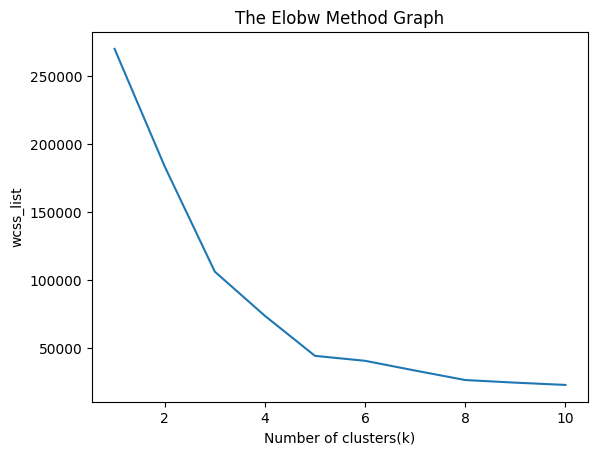

In [5]:
from sklearn.cluster import KMeans
wcss_list= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

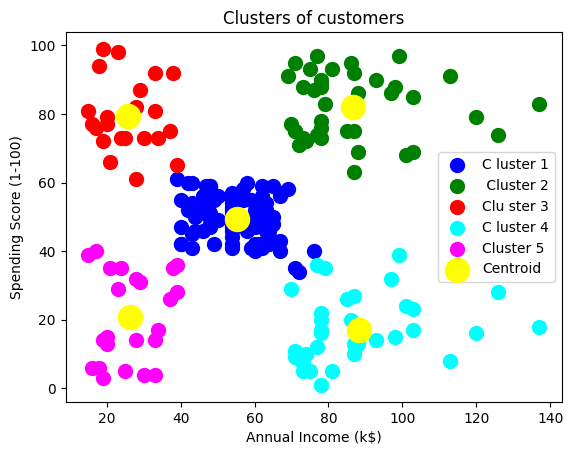

In [ ]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue',
label = 'C luster 1')
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green',
label = ' Cluster 2')
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red',
label = 'Clu ster 3')
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan',
label = 'C luster 4')
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c ='magenta',
label = 'Cluster 5')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s
= 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()
